In [40]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
np.random.seed(81093)
N = 14
G = nx.generators.directed.random_k_out_graph(N, 2, 1.1, self_loops = False, seed = 9012533)
G = nx.DiGraph(G)
nx.set_edge_attributes(G, dict(zip(G.edges, np.random.rand(len(G.edges)) < 0.25)), 'neg')

In [42]:
nx.get_edge_attributes(G, 'neg')

{(0, 12): False,
 (0, 5): True,
 (1, 2): True,
 (2, 13): True,
 (2, 10): True,
 (3, 4): True,
 (3, 8): True,
 (4, 1): False,
 (4, 12): False,
 (5, 11): False,
 (6, 4): True,
 (6, 12): True,
 (7, 4): False,
 (8, 4): False,
 (8, 5): False,
 (9, 6): False,
 (9, 4): False,
 (10, 12): True,
 (10, 7): False,
 (11, 4): False,
 (11, 5): False,
 (12, 13): False,
 (12, 4): True,
 (13, 8): True,
 (13, 4): False}

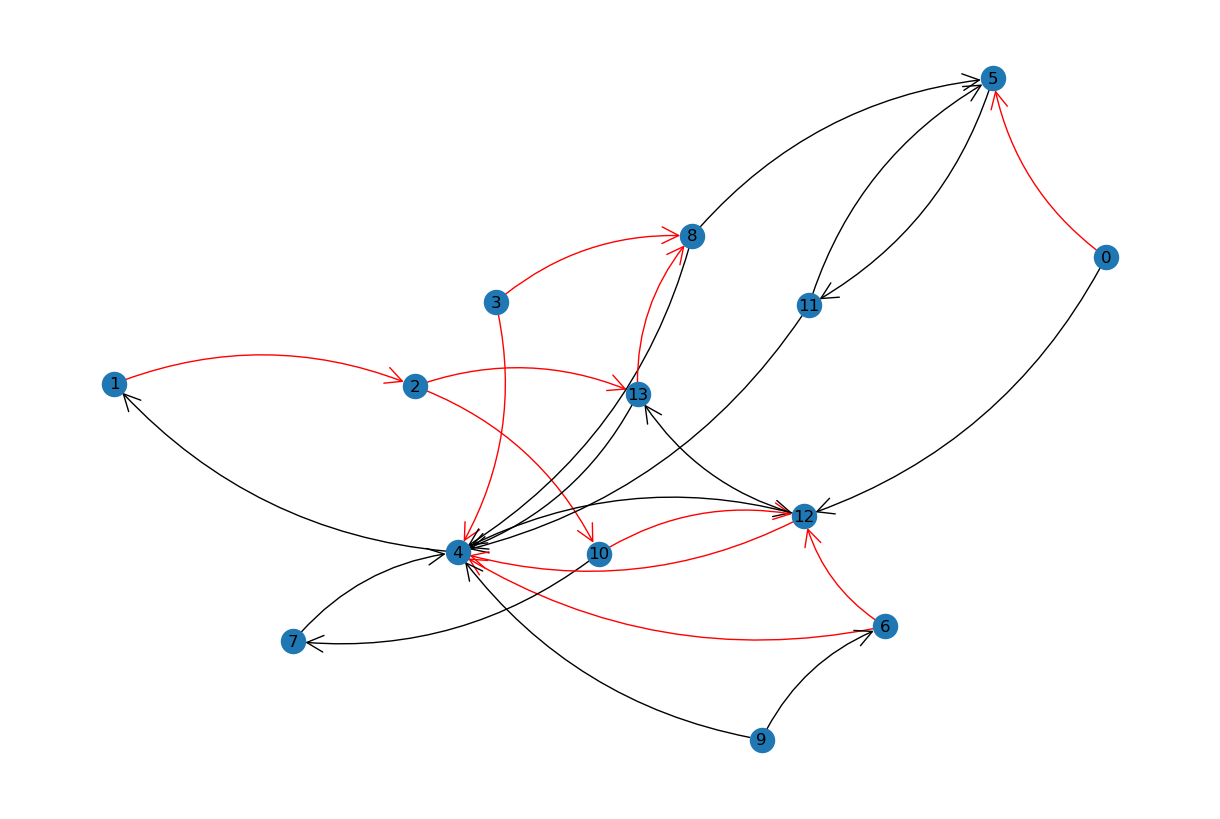

In [43]:
plt.figure(figsize = (12, 8), dpi = 100)

pos = nx.spring_layout(G, seed = 789523)
nx.draw(
    G, pos,
    with_labels = True,
    arrowsize = 30,
    arrowstyle = '->',
    connectionstyle = "arc3,rad=-0.2",
    edge_color = [ 'red' if neg else 'black' for neg in nx.get_edge_attributes(G, 'neg').values() ],
)

plt.show()

In [44]:
dist, path = nx.single_source_dijkstra(G, 0)
scc = list(nx.strongly_connected_components(G.edge_subgraph((u, v) for u, v, e in G.edges(data = True) if not e['neg'])))
print(scc)
G2 = G.edge_subgraph((u, v) for u, v, e in G.edges(data = True) if not e['neg'])
G2 = nx.condensation(G2)

topo_sort = dict((x, i) for i, x in enumerate(nx.topological_sort(G2)))
print(topo_sort)

[{1}, {4, 12, 13}, {0}, {11, 5}, {6}, {7}, {8}, {9}, {10}]
{8: 0, 5: 1, 7: 2, 4: 3, 6: 4, 3: 5, 2: 6, 1: 7, 0: 8}


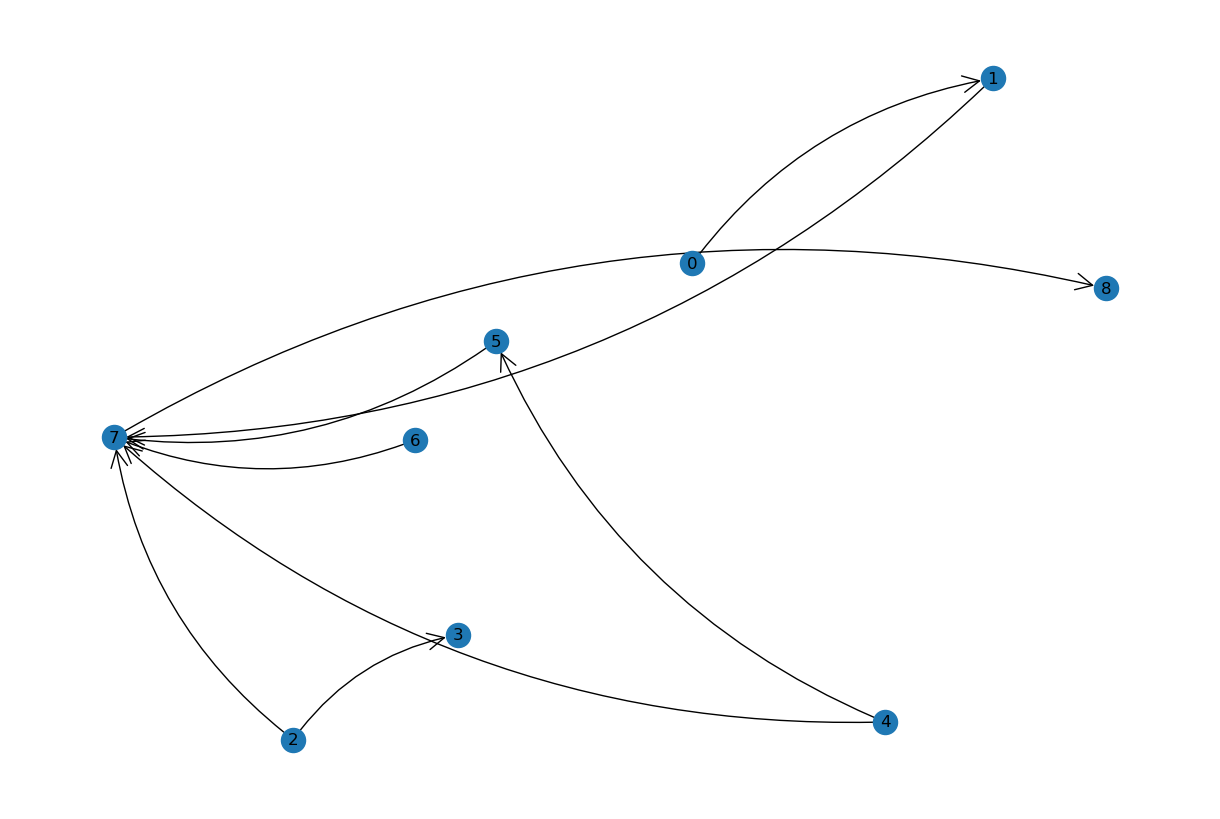

In [45]:
plt.figure(figsize = (12, 8), dpi = 100)
nx.draw(
    G2, pos,
    labels = topo_sort,
    with_labels = True,
    arrowsize = 30,
    arrowstyle = '->',
    connectionstyle = "arc3,rad=-0.2",
)


In [48]:
topo_sort_uncondensed = dict()
for x in G.nodes:
    y = G2.graph['mapping'].get(x)
    if y is not None:
        topo_sort_uncondensed[x] = topo_sort[y]
print(topo_sort_uncondensed)

{0: 6, 1: 8, 4: 7, 5: 5, 6: 3, 7: 1, 8: 4, 9: 2, 10: 0, 11: 5, 12: 7, 13: 7}


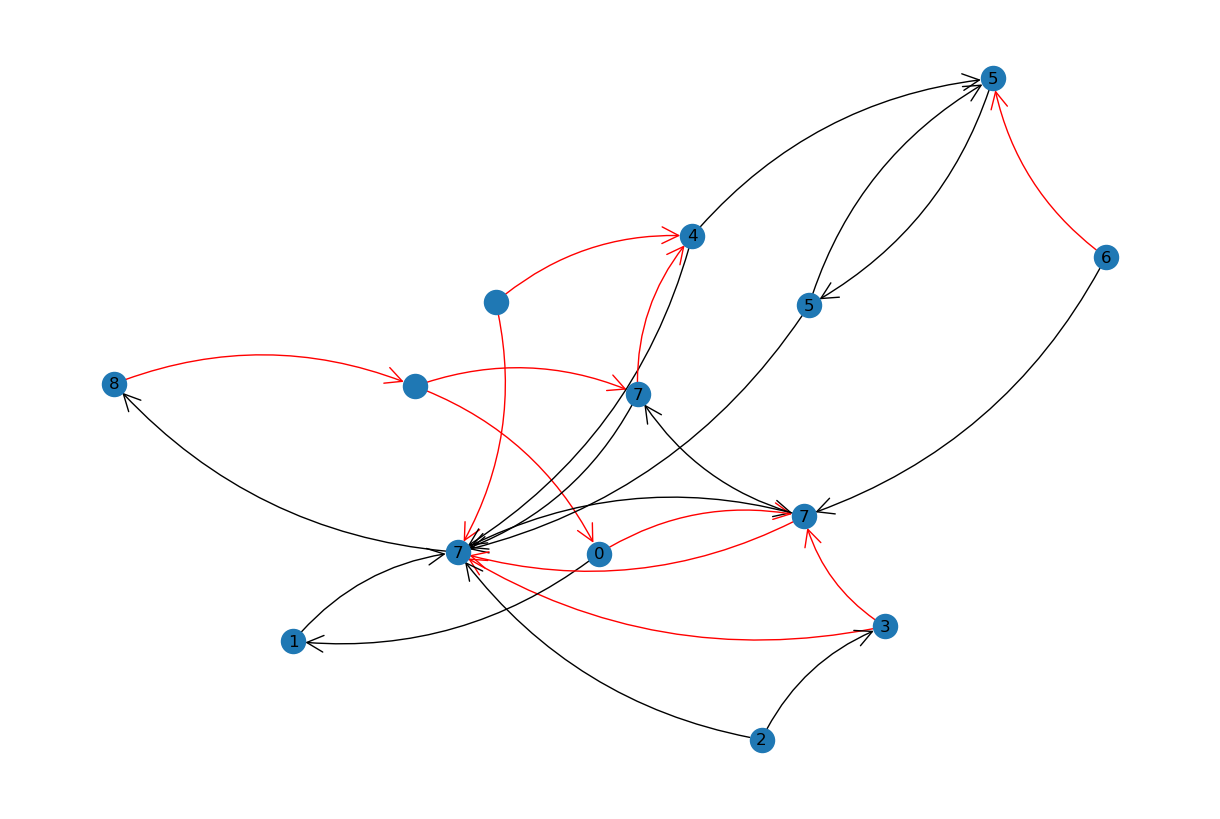

In [49]:
plt.figure(figsize = (12, 8), dpi = 100)
nx.draw(
    G, pos,
    labels = topo_sort_uncondensed,
    with_labels = True,
    arrowsize = 30,
    arrowstyle = '->',
    connectionstyle = "arc3,rad=-0.2",
    edge_color = [ 'red' if neg else 'black' for neg in nx.get_edge_attributes(G, 'neg').values() ]
)